<img src=https://kto-ozvuchival.ru/wp-content/uploads/2017/12/kto-ozvuchivaet-toni-starka-na-russkom-800x500.jpg><br>
<hr style="border: 10px solid green;" />

## <span style="color:green">Финальный комментарий<span>
Спасибо за проделанную работу🤝

Сергей, спасибо за доработки, всё принято👌

Еще немного улучшений или _куда можно двигаться_ :
- лучше использовать какое-то понимаемое обозначение, например, <code>Не указано</code>
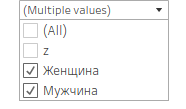
    
- стоит уделить внимание верстке, чтобы не было "съехавших" частей. Можно начать с моего [небольшого видео](https://youtu.be/b-CFxh9LdlU)
- поиграться с расположением графиков, иногда удобнее повернуть, например, было:
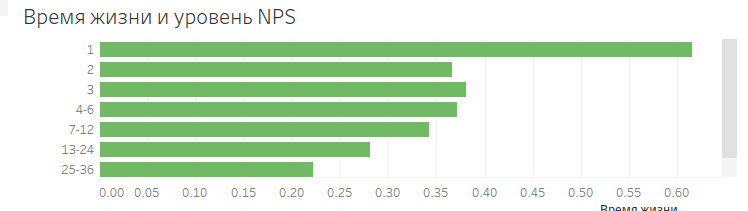

    
стало:
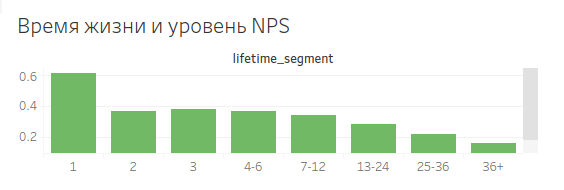
    
Во втором варианте динамика показателя читается легче
    
В качестве бонуса, рекомендую, отличную книгу про оформление презентаций, графиков - [Александр Богачев, Графики, которые убеждают](https://ru.bookmate.com/books/pfLCYNJM) и можно заглянуть в канал и сайт [Ромы Бунина](https://t.me/revealthedata) (кажется, главный человек по визуализации в Росии😉)

Поздравляю, проект принят👍

<hr style="border: 2px solid green;" />

## Комментарий ревьювера

Сергей, Привет! 

🤚Меня зовут, Олег Юрьев, я буду проверять твой проект. Если не против, я буду обращаться к тебе на _ТЫ_ . Если это неприемлемо, обязательно напиши мне в комментариях - мы перейдем на _ВЫ_ .

🤝Спасибо, что сдал проект вовремя. Тобой проделана большая работа, молодец! 

✏️В этой тетрадке ты найдешь мои комментарии.

Комментарии будут выделены:

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа ✅</b><br>
    Безупречная работа</div>       
<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить ⚠️</b><br>
    Ничего дорабатывать не надо, данные пункты работают нормально, но есть способы улучшить. Несколько таких комментариев допустимы, но более - придется некоторые доработать. Большое кол-во мелких замечаний и помарок сказываются на общем впечатлении от работы.</div>   
<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать ⛔️</b><br>
    Такие пункты необходимо исправить в первую очередь, чтобы я смог принять проект.</div>
 
Не удаляй комментарии, так будем следить за динамикой 📈
   
Давай будем в диалоге - основные цели в диалоге:
- обмен опытом (да я тоже учусь у студентов👨‍🎓)
- выполнить проект еще лучше
- помочь тебе стать аналитиком

Поэтому чтобы мне проще было проверять повторно, а тебе контролировать процесс ревью, оставляй свои комментарии и выделяй их. 
    
<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Например, вот так.</div>
   
Поехали! :)

<hr style="border: 2px solid green;" />

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Финальный-комментарий" data-toc-modified-id="Финальный-комментарий-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><span style="color: green">Финальный комментарий<span></span></span></a></span></li><li><span><a href="#Комментарий-ревьювера" data-toc-modified-id="Комментарий-ревьювера-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Комментарий ревьювера</a></span></li><li><span><a href="#Общий-комментарий" data-toc-modified-id="Общий-комментарий-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий комментарий</a></span></li></ul></div>

In [1]:
import os
import pandas as pd
from sqlalchemy import create_engine

# путь к БД на вашем компьютере (например, в той же папке, что и тетрадь)
path_to_db_local = 'telecomm_csi.db'
# путь к БД на платформе
path_to_db_platform = '/datasets/telecomm_csi.db'
# итоговый путь к БД
path_to_db = None

# если путь на вашем компьютере ведёт к БД, то он становится итоговым
if os.path.exists(path_to_db_local):
    path_to_db = path_to_db_local
# иначе: если путь на платформе ведёт к БД, то он становится итоговым
elif os.path.exists(path_to_db_platform):
    path_to_db = path_to_db_platform
# иначе выводится сообщение о том, что файл не найден
else:
    raise Exception('Файл с базой данных SQLite не найден!')

# если итоговый путь не пустой
if path_to_db:
    # то создаём подключение к базе
    engine = create_engine(f'sqlite:///{path_to_db}', echo=False)


In [2]:
query = """
    SELECT u.user_id,
           u.lt_day,
           case
                 when u.lt_day <= 365 then 'Новый'
                 else 'Старый'
                 end as it_new,
           u.age,
           case
                 when u.gender_segment == 1 then 'Мужчина'
                 when u.gender_segment == 0 then 'Женщина'
                 else 'z'
                 end as gender_segment,
           u.os_name,
           u.cpe_type_name,
           l.country,
           l.city,
           substr (a.title, 4) as age_segment,      
           substr (t.title, 4) as traffic_segment,
           substr (ls.title, 4) as lifetime_segment,          
           u.nps_score,
           case 
                 when u.nps_score >= 9 then 'Сторонник'
                 when u.nps_score >= 7 then 'Нейтрал'
                 else 'Критик'
                 end as nps_group   
    FROM user u
    JOIN location l on u.location_id = l.location_id
    JOIN age_segment a on u.age_gr_id = a.age_gr_id
    JOIN traffic_segment t on u.tr_gr_id = t.tr_gr_id
    JOIN lifetime_segment ls on u.lt_gr_id = ls.lt_gr_id;
    """

In [3]:
df = pd.read_sql(query, engine)

In [4]:
df.head(10)

,user_id,lt_day,it_new,age,gender_segment,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_group
0,A001A2,2320,Старый,45.0,Мужчина,ANDROID,SMARTPHONE,Россия,Уфа,45-54,1-5,36+,10,Сторонник
1,A001WF,2344,Старый,53.0,Женщина,ANDROID,SMARTPHONE,Россия,Киров,45-54,1-5,36+,10,Сторонник
2,A003Q7,467,Старый,57.0,Женщина,ANDROID,SMARTPHONE,Россия,Москва,55-64,20-25,13-24,10,Сторонник
3,A004TB,4190,Старый,44.0,Мужчина,IOS,SMARTPHONE,Россия,РостовнаДону,35-44,0.1-1,36+,10,Сторонник
4,A004XT,1163,Старый,24.0,Женщина,ANDROID,SMARTPHONE,Россия,Рязань,16-24,5-10,36+,10,Сторонник
5,A005O0,5501,Старый,42.0,Мужчина,ANDROID,SMARTPHONE,Россия,Омск,35-44,5-10,36+,6,Критик
6,A0061R,1236,Старый,45.0,Женщина,ANDROID,SMARTPHONE,Россия,Уфа,45-54,10-15,36+,10,Сторонник
7,A009KS,313,Новый,35.0,Женщина,ANDROID,SMARTPHONE,Россия,Москва,35-44,45-50,7-12,10,Сторонник
8,A00AES,3238,Старый,36.0,Мужчина,ANDROID,SMARTPHONE,Россия,СанктПетербург,35-44,1-5,36+,10,Сторонник
9,A00F70,4479,Старый,54.0,Мужчина,ANDROID,SMARTPHONE,Россия,Волгоград,45-54,15-20,36+,9,Сторонник


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502493 entries, 0 to 502492
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           502493 non-null  object 
 1   lt_day            502493 non-null  int64  
 2   it_new            502493 non-null  object 
 3   age               501939 non-null  float64
 4   gender_segment    502493 non-null  object 
 5   os_name           502493 non-null  object 
 6   cpe_type_name     502493 non-null  object 
 7   country           502493 non-null  object 
 8   city              502493 non-null  object 
 9   age_segment       502493 non-null  object 
 10  traffic_segment   502493 non-null  object 
 11  lifetime_segment  502493 non-null  object 
 12  nps_score         502493 non-null  int64  
 13  nps_group         502493 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 53.7+ MB


In [6]:
df.to_csv('file.csv') 

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b>
    <br/>
    <br>Привет, сборный проект под номером 2 готов =)<br/>
    <br/> Меня зовут Сергей, буду рад перейти на ты. Если это неприемлемо, обязательно напиши мне в комментариях - мы перейдем на ВЫ .
    <br/>
    <br/>
    <br/>
<a href='https://public.tableau.com/app/profile/sergey.gordeychuk/viz/2_16836571169070/Story1?publish=yes' >Это ссылка на Презентацию</a>
<br/>
    <br/>
    <br/>    
    
    
Спасибо за внимание!)    
</div>


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Комментарий</b><br>Принято🙏</div> 

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> 

## Общий комментарий
Спасибо за проделанную работу🤝

Сергей, ниже комментарии по разделам проекта:
    
**Pipeline**

✅ SQL запрос написан корректно, молодец!
    
    
----------------------
**Dash**

🔴Доработки:
- опубликовать только нужные вкладки, а не все подряд - [поможет видео](https://youtu.be/iKNbpYqQNCc)
- по первой части:
 -  было бы хорошо поработать с версткой, выглядит так будто графики разместили в случайном порядке, например, легенда от круговой куда-то ускакала:
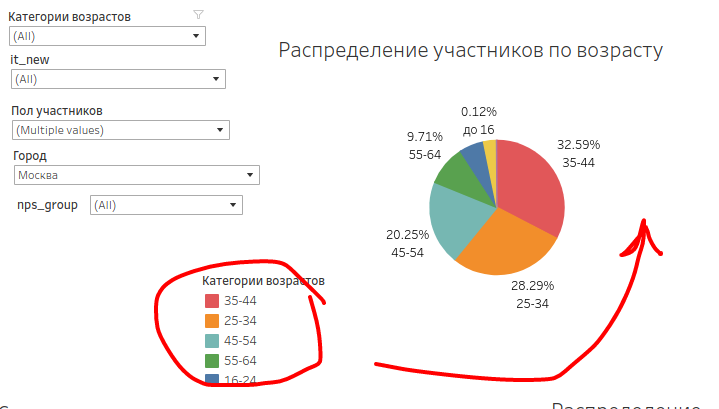
 - таблицу _Распределение участников по полу_ думаю лучше выполнить в виде круговой
 - график _Распределение участников по городам_ не понял, тк город всего лишь один
- по второй части:
 - не совсем понял, как такое возможно (почему получилось, что столбики 6 и 7 друг над другом🤔):
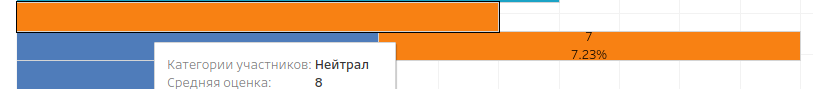
 - комментарии не совсем понятны, тк цифры соответствуют долям, но ты их называешь лояльностью. Лояльность = уровню NPS, который рассчитывается согласно формуле _%сторонников - %критиков_
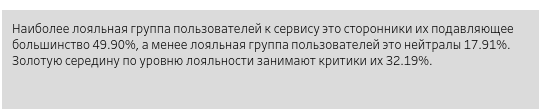
- по 3 части:
 - стоит отказаться от приписки к графикам <code>...- сторонники</code>, тк графики построены на всех данных - это вводит в заблуждение. Соцдем по сторонникам можно посмотреть в 1 части, если использовать фильтр.
 - тут тоже надо что-то делать с версткой, тк график по городам также показывает только Москву
- по 4 части:
 - здесь всё хорошо. Может быть, стоит выполнить таблицу по возрасту в виде графика, чтобы лучше видеть динамику NPS
 - есть расхождение в общем уровне NPS
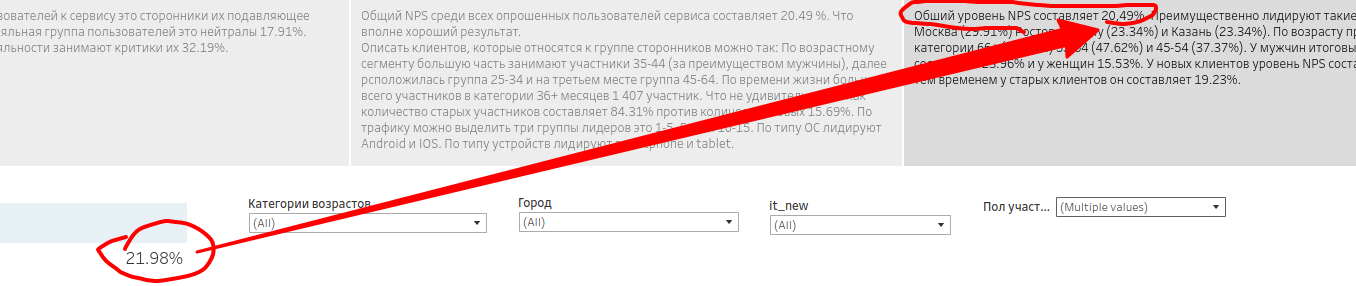
    
**Общее**
- фильтры на всех вкладках привести в соответствие (одинаковые типы - везде выпадающие списки с множественным выбором и расположение - лучше когда структура дашборда фиксирована) и наименования должны быть человекочитаемы, например, <code>lt_new -> Действующий\Новый клиент</code>
    
    
    
💡Улучшения:
- для графика _Распределение участников по возрасту и полу_ лучше использовать сортировку по возрастанию возраста групп - так естественнее
- по ОС и устройствам предлагаю выделить 2-3 крупных категории, остальные убрать в категорию _Other_ - тк станет проще анализировать, тк категорий много и они малы по объему
    
----------------------
**Slides**

✅ Согласно требованиям проекта нужна презентация (PowerPoint или Google Slides или иная), но думаю можно зачесть Story в качестве презентации.
    
💡 Подумай не тему: расположить выводы на самом листе, а не кнопке Story
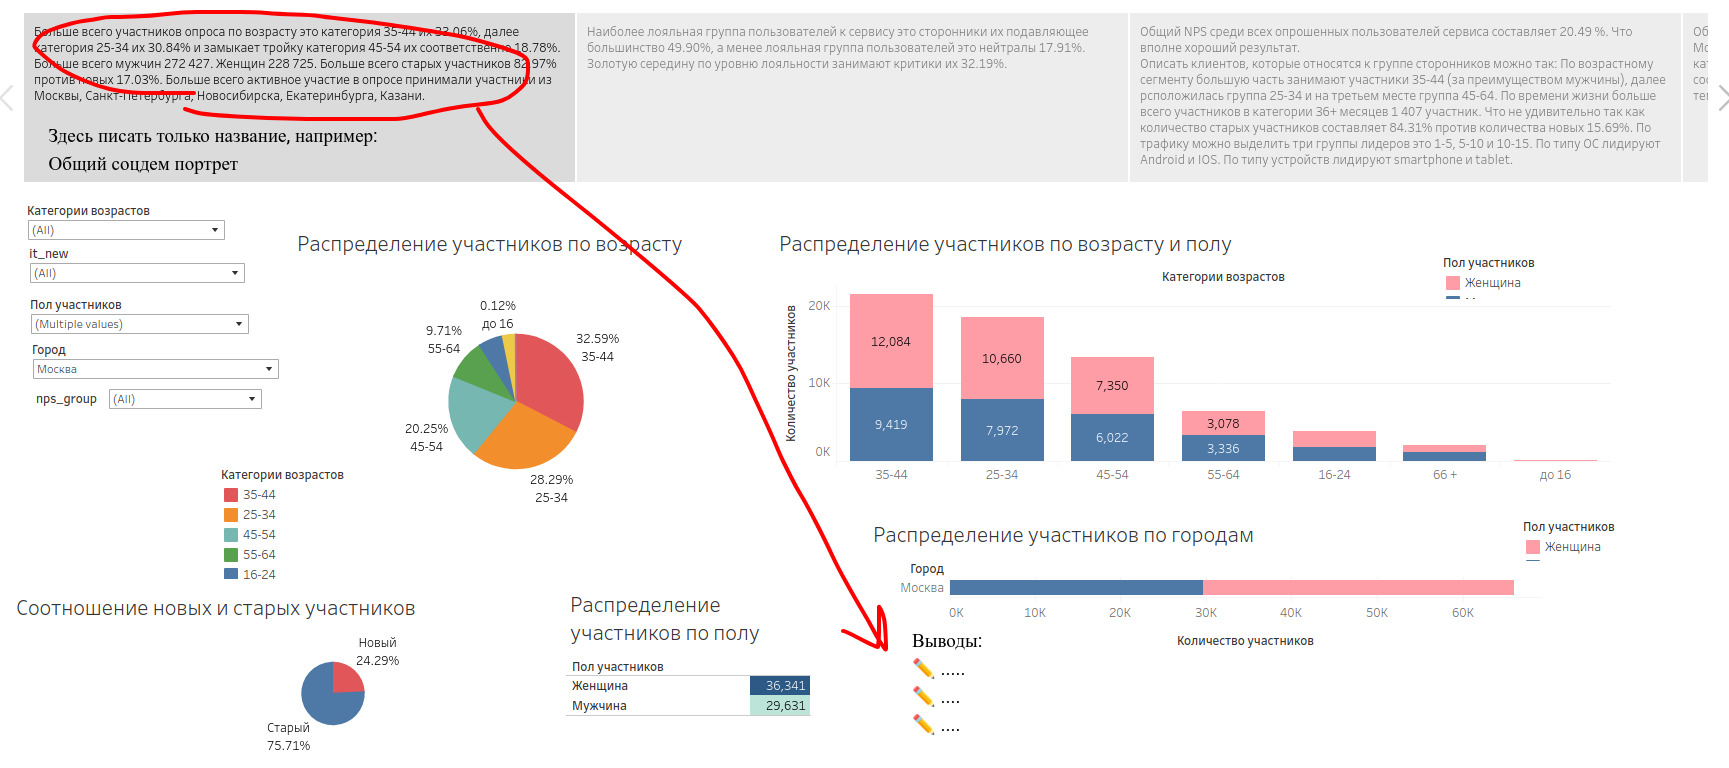


Исправляй и отправляй на проверку🛠

Спасибо за структурированный ответ и комментарии.
Подкорректировал проект, высылаю.


https://public.tableau.com/app/profile/sergey.gordeychuk/viz/2_16836571169070/Story1?publish=yes